In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [15]:
train_labels = pd.read_csv('../datasets/train_labels.csv')
train_values = pd.read_csv('../datasets/train_values.csv')

### Número de edificaciones con cada grado de daño segun el tipo de cimiento

In [16]:
foundation_type = train_values[['foundation_type','building_id']]
foundation_type = train_labels.merge(foundation_type)

In [17]:
foundation_type = foundation_type.groupby(['foundation_type','damage_grade']).count().\
    rename(columns={'building_id':'cantidad_de_edificaciones'})
foundation_type

cantidad_de_edificaciones
foundation_type damage_grade                           
h               1                                   358
                2                                   579
                3                                   511
i               1                                  6004
                2                                  4354
                3                                   221
r               1                                 10720
                2                                125515
                3                                 82961
u               1                                  3689
                2                                  8541
                3                                  2030
w               1                                  4353
                2                                  9270
                3                                  1495

In [18]:
foundation_type = foundation_type.reset_index().\
 pivot(index='foundation_type', columns='damage_grade', values='cantidad_de_edificaciones')
foundation_type

damage_grade,1,2,3
foundation_type,,,
h,358,579,511
i,6004,4354,221
r,10720,125515,82961
u,3689,8541,2030
w,4353,9270,1495


Text(0, 0.5, 'Cantidad de edificaciones')

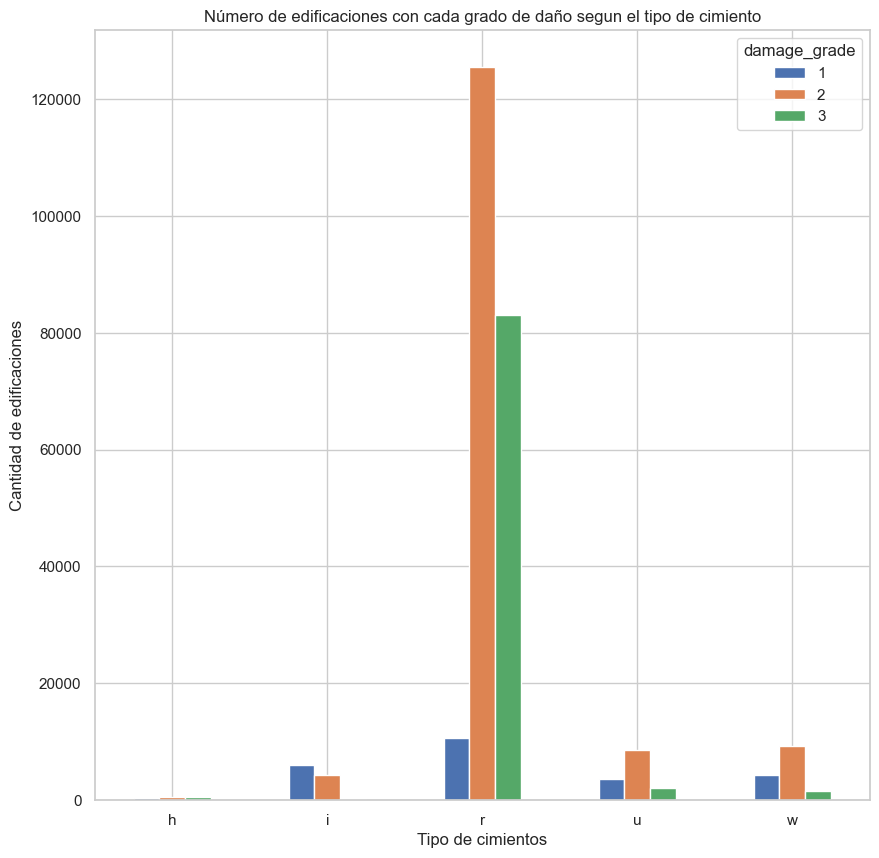

In [19]:
foundation_type.plot(kind='bar',figsize=(10,10),\
        rot=0,title='Número de edificaciones con cada grado de daño segun el tipo de cimiento')
ax=plt.gca()
ax.set_xlabel('Tipo de cimientos')
ax.set_ylabel('Cantidad de edificaciones')

Observamos que el tipo de cimiento que más se utilizo en las edificaciones fue el tipo r, y el tipo de cimiento que menos se utilizo fue el tipo de cimiento h

### Porcentaje del número de edificaciones con cada grado de daño segun el tipo de cimiento

In [20]:
foundation_type_percentage = train_values[['building_id','foundation_type']]
foundation_type_percentage = train_labels\
    .merge(foundation_type_percentage, how='inner')

In [21]:
damage_grade_foundation_type_percentage = foundation_type_percentage\
    .groupby(['foundation_type','damage_grade'])\
    .agg('count')\
    .reset_index()

total_buildings_by_foundation_type = foundation_type_percentage[['foundation_type', 'building_id']]\
    .groupby('foundation_type')\
    .count()\
    .reset_index()\
    .rename(columns= { 'building_id': 'total_buildings_by_foundation_type' } )

damage_grade_foundation_type_percentage = damage_grade_foundation_type_percentage\
    .merge(total_buildings_by_foundation_type)

damage_grade_foundation_type_percentage['percentage'] = (damage_grade_foundation_type_percentage['building_id'] * 100) / damage_grade_foundation_type_percentage['total_buildings_by_foundation_type']
df_grado_porcentaje_damage_grade = damage_grade_foundation_type_percentage
damage_grade_foundation_type_percentage[['foundation_type', 'damage_grade', 'percentage']]

,foundation_type,damage_grade,percentage
0,h,1,24.72
1,h,2,39.99
2,h,3,35.29
3,i,1,56.75
4,i,2,41.16
5,i,3,2.09
6,r,1,4.89
7,r,2,57.26
8,r,3,37.85
9,u,1,25.87


In [22]:
damage_grade_foundation_type_percentage = damage_grade_foundation_type_percentage\
    .pivot(index='foundation_type', columns='damage_grade',values='percentage')

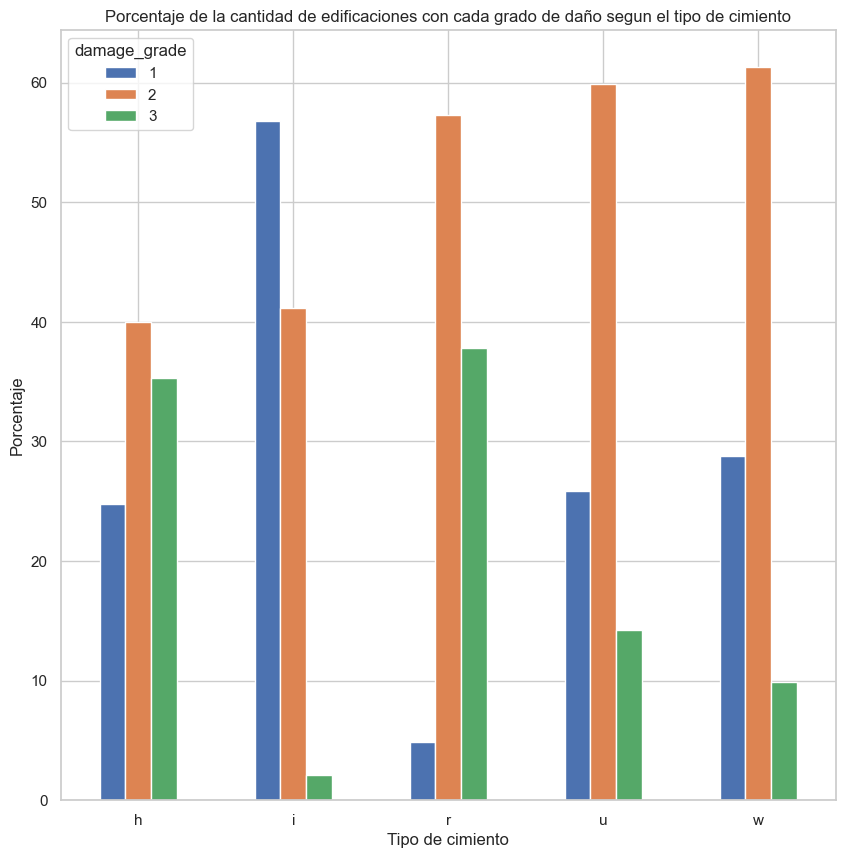

In [23]:
damage_grade_foundation_type_percentage.plot(kind='bar',figsize=(10,10), rot=0, \
 title='Porcentaje de la cantidad de edificaciones con cada grado de daño segun el tipo de cimiento')
ax=plt.gca()
ax.set_xlabel('Tipo de cimiento')
ax.set_ylabel('Porcentaje');

Como se sabe, el tipo de cimiento más usado en las construcciones de edificaciones, fue el tipo r, vemos que más del 50% de estas edificaciones sufrieron un grado de daño 2

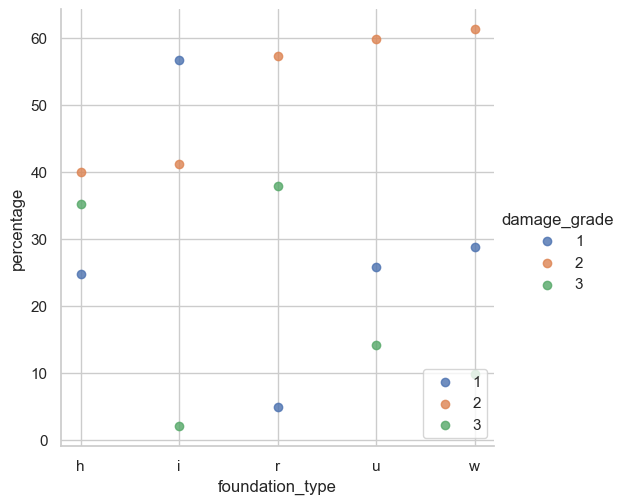

In [24]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

#df_ages_and_damage_with_percentage_filtered = df_ages_and_damage_with_percentage.loc[df_ages_and_damage_with_percentage['age'] <= 100, :]
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="foundation_type", y="percentage", data=df_grado_porcentaje_damage_grade, \
           fit_reg=False, hue='damage_grade', legend=True)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

Observamos que más del 60% de la edificaciones con el tipo de cimiento u ó w, sufrieron un grado de daño 2

El tipo de cimiento que obtuvo mas daño de grado 3 en sus edificaciones, fue el r, casi el 40% de las edificaciones con el tipo de cimiento r, sufrieron daño de grado 3. En cambio el tipo de cimiento que obtuvo menos daño de grado 3 en sus edificaciones, fue el i, solo un 2.09% de las edificaciones con el tipo de cimiento i, sufrieron daño de grado 3

Como vimos, solo un 2.09% de las edificaciones con tipo de cimiento i tiene grado de daño 3, y lo interesante es que 56.75% de las edificaciones con tipo de cimiento i tiene grado de daño 1, la mayoria de las edificaciones sufrieron un daño leve.